# Problem Statement
Make a decision tree classifier to predict whether a person has diabetes or not, based on information given in the dataset about the patient such as blood pressure, body mass index (BMI), age, etc.

#### Import all libraries 

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix


# Step-1. Understanding data

In [4]:
df_diabetes = pd.read_csv('/content/drive/MyDrive/data set/Diabetes/diabetes.csv')

In [5]:
#Check the number of rows and columns
df_diabetes.shape

(768, 9)

In [6]:
#display the top 5 data records
pd.set_option('max_rows',None)
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
# checking the summary 
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
#check the statistics of data
df_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
# Explore missing values

df_diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Step-2. Data Cleaning

## 1. checking/missing value treatment

In [10]:
df_diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Observation:
###### • Here no missing values in dataset

## 2. Outliers checking/treatment

In [11]:
df_diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

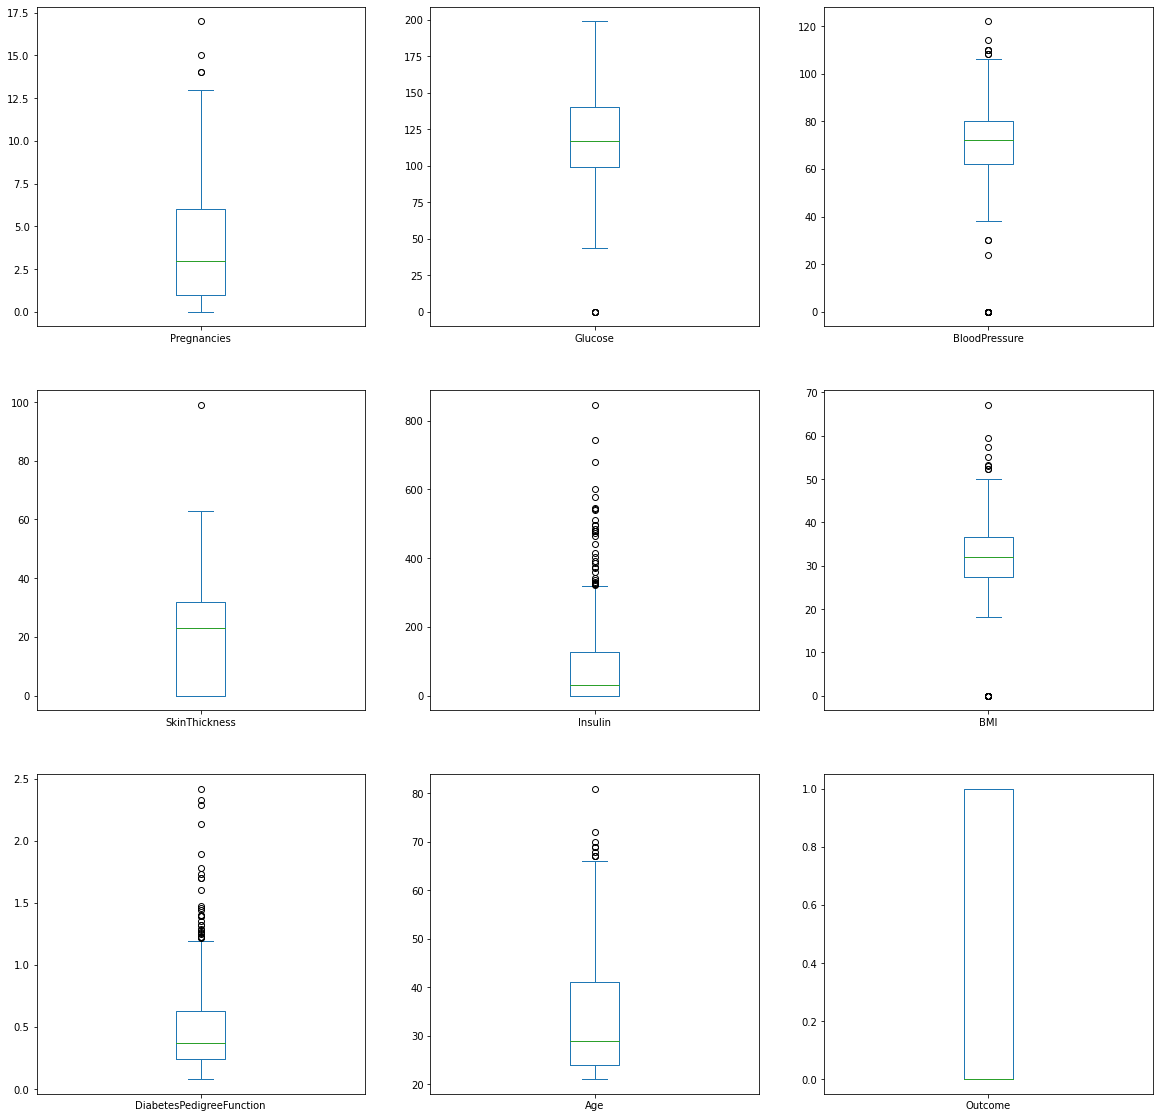

In [12]:
#detect Outliers 
df_diabetes.plot(kind='box' , subplots = True , figsize = (20,20) , layout = (3,3))
plt.show()

In [13]:
#treatment of outliers
column = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

def plot_num(num):
    plt.figure(figsize=(6,6))
    plt.title(num)
    sns.boxplot(df_diabetes[num])
    plt.show()
    return

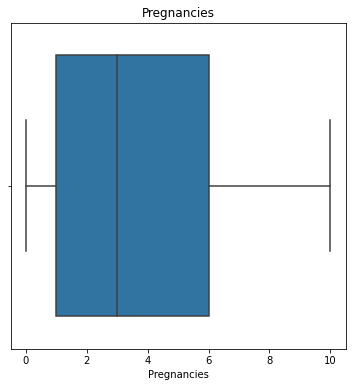

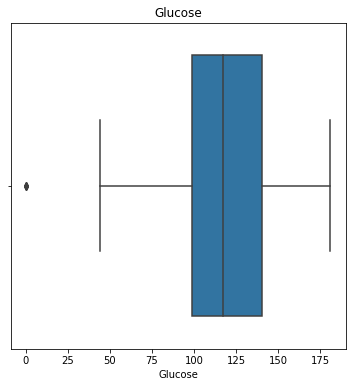

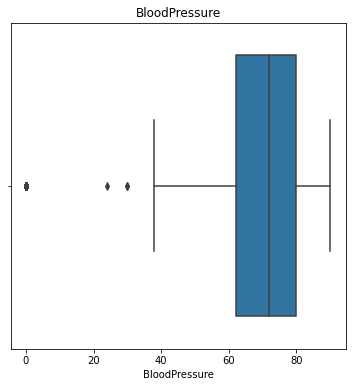

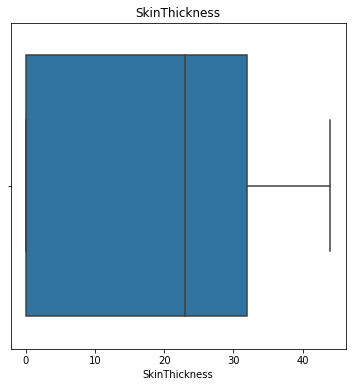

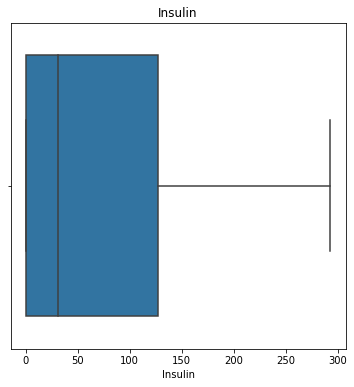

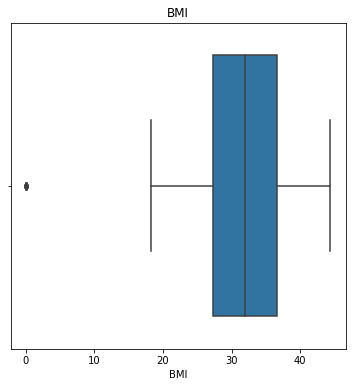

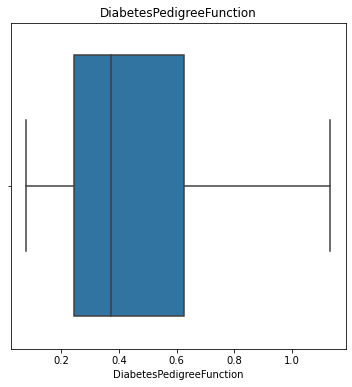

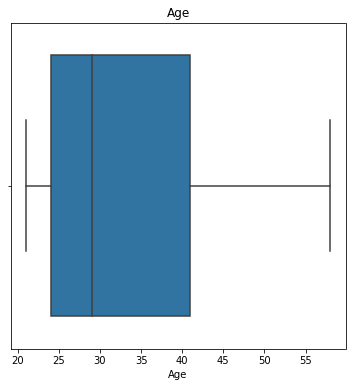

In [14]:
for num in column:
    q3,q1 = np.percentile(df_diabetes[num],[75,25])
    q4 = np.percentile(df_diabetes[num],[95])
    df_diabetes.loc[df_diabetes[num] > q4[0] , num] = q4[0]
    plot_num(num)

# Step-3. Data analysis 

## 1. Univariate Analysis 

In [15]:
df_col = list(df_diabetes.columns)
df_col

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [16]:
df_col.remove('Outcome')
df_col

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

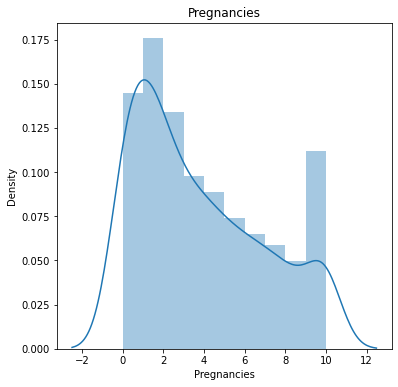

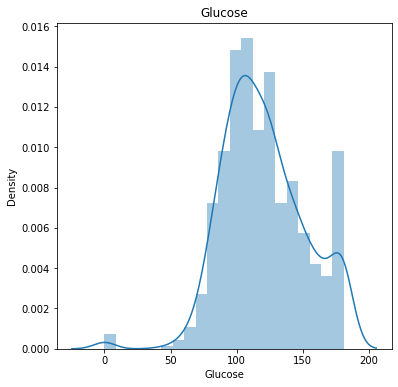

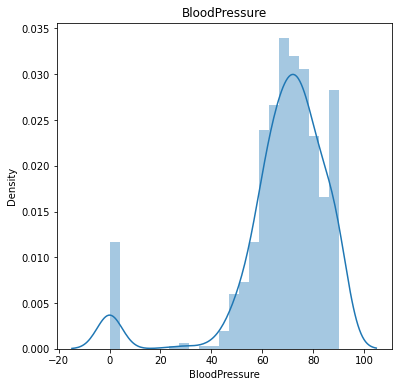

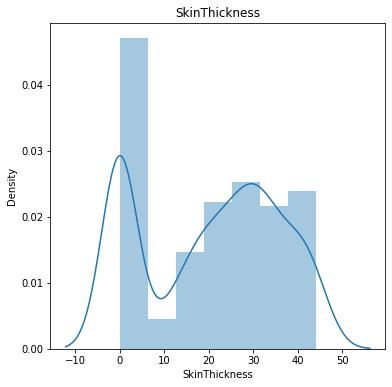

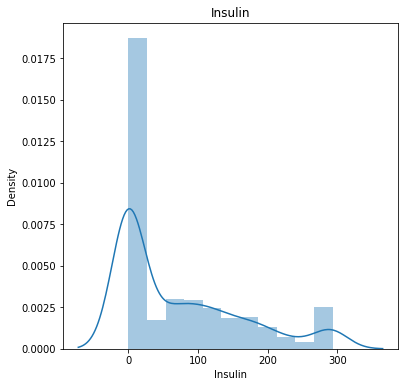

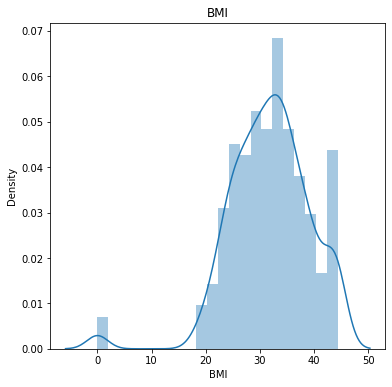

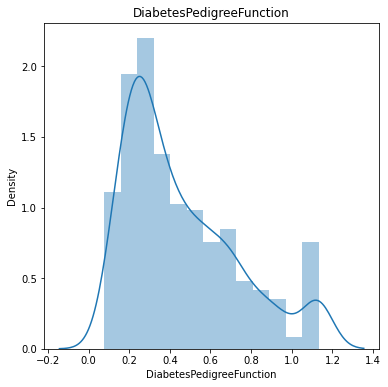

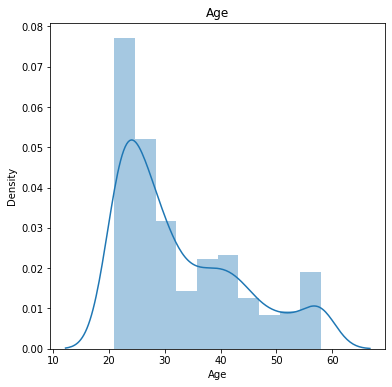

In [17]:
for num in df_col:
    plt.figure(figsize=(6,6))
    sns.distplot(df_diabetes[num])
    plt.title(num)
    plt.show()

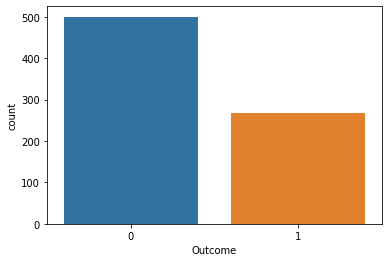

In [18]:
sns.countplot(x = df_diabetes.Outcome)
plt.show()

## 2. Bivariate Analysis :

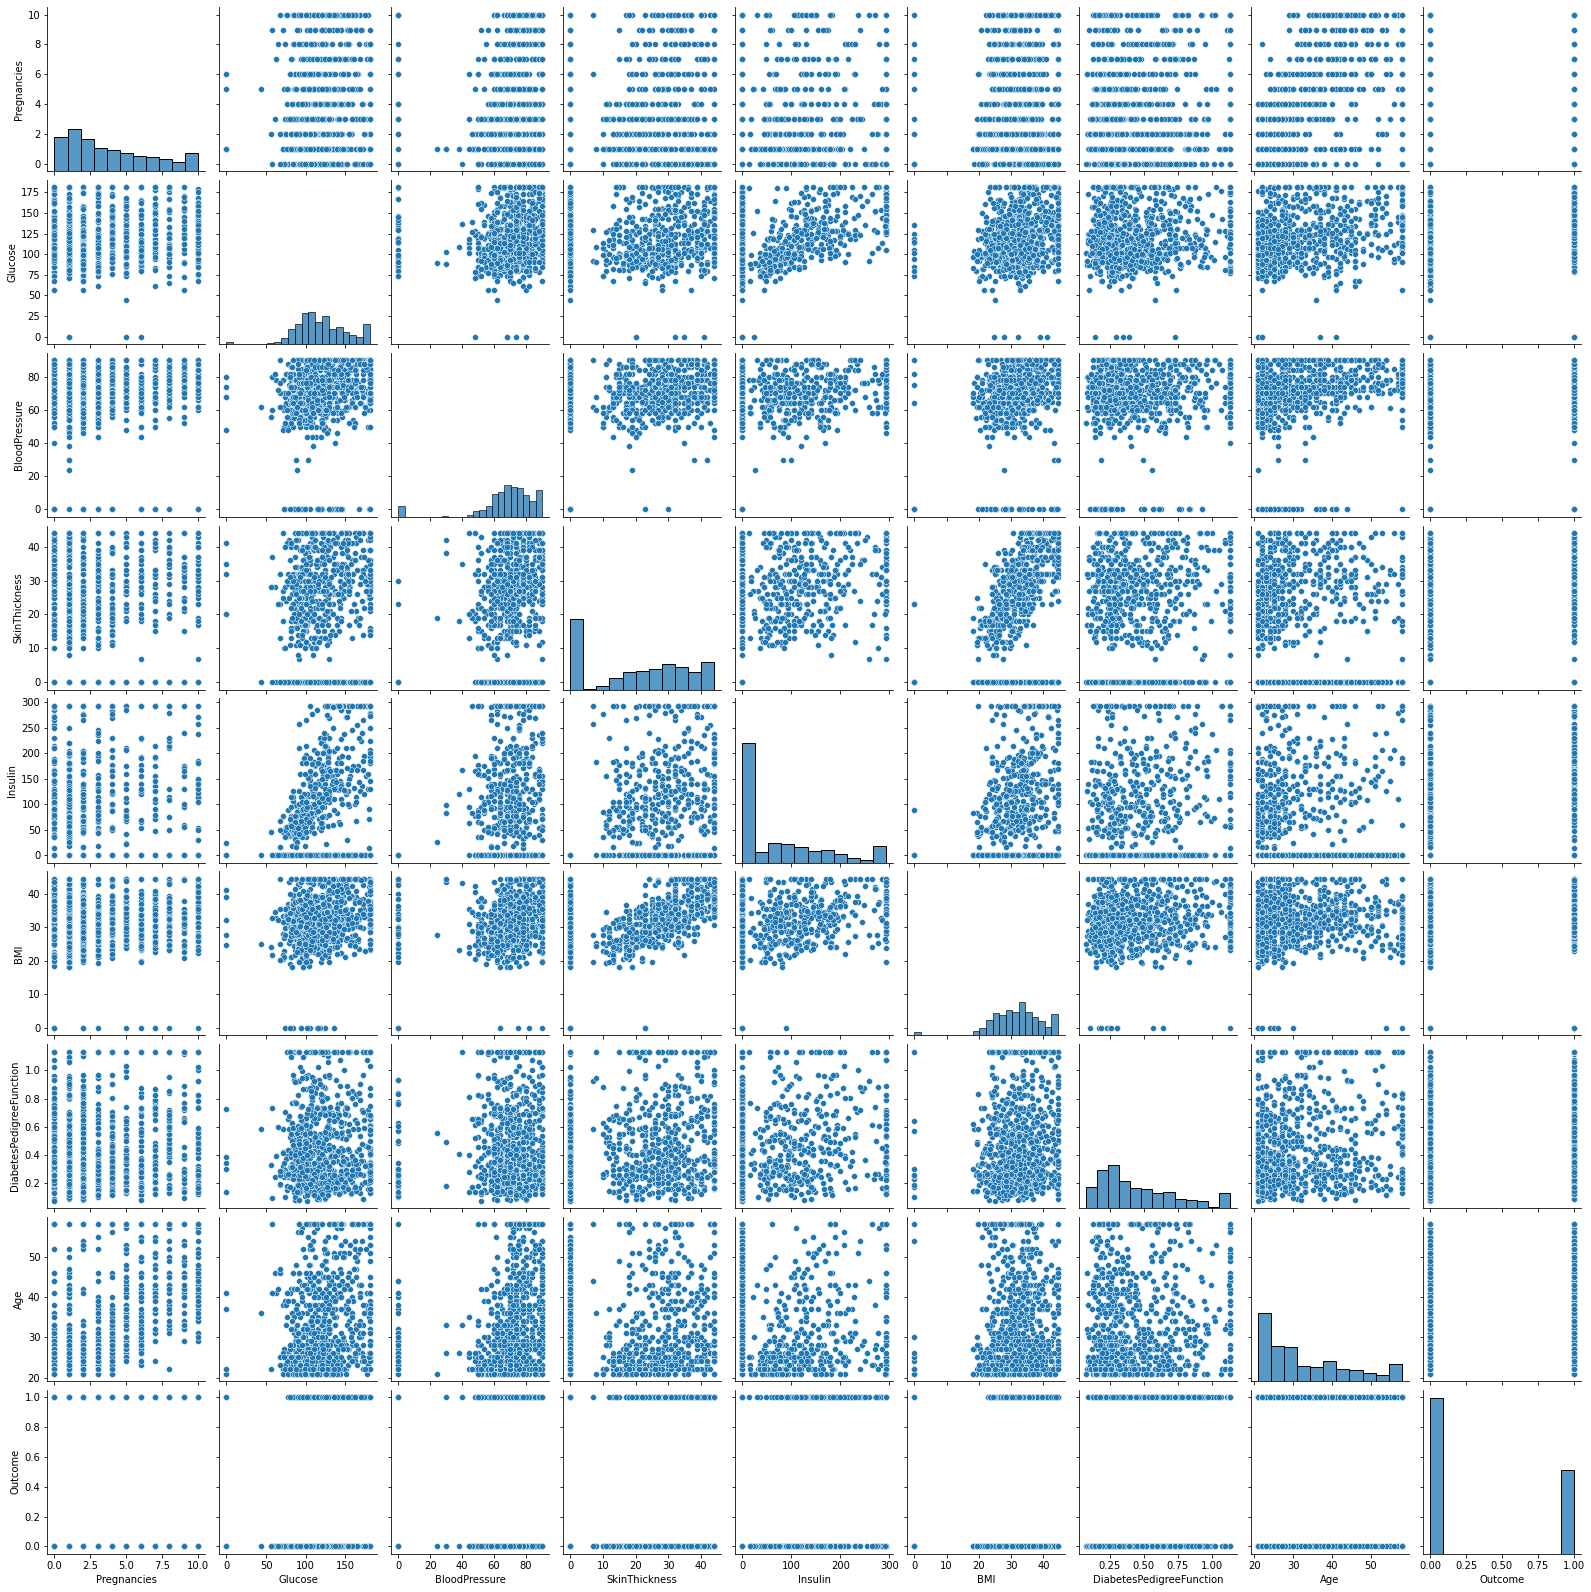

In [19]:
# draw pairplot for all column
sns.pairplot(df_diabetes)

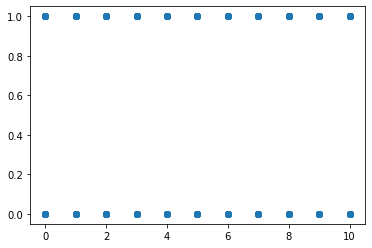

In [20]:
plt.scatter(data = df_diabetes , x = 'Pregnancies' , y = 'Outcome')

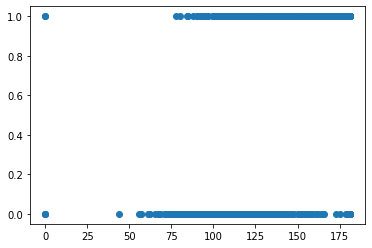

In [21]:
plt.scatter(data = df_diabetes , x = 'Glucose' , y = 'Outcome')

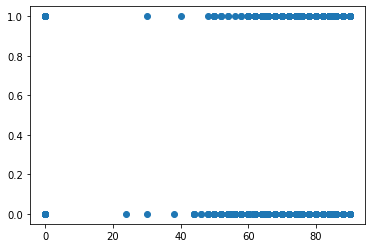

In [22]:
plt.scatter(data = df_diabetes , x = 'BloodPressure' , y = 'Outcome')

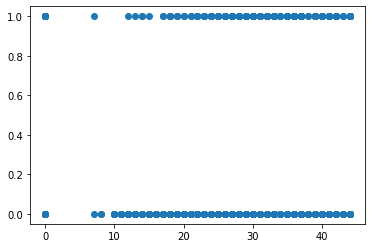

In [23]:
plt.scatter(data = df_diabetes , x = 'SkinThickness' , y = 'Outcome')

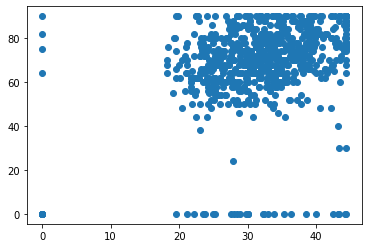

In [24]:
plt.scatter(data = df_diabetes , x = 'BMI' , y = 'BloodPressure')

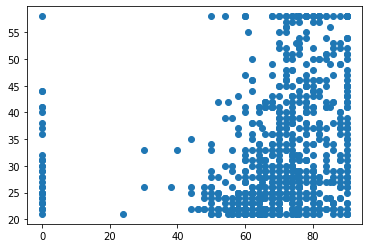

In [25]:
plt.scatter(data = df_diabetes , x = 'BloodPressure' , y = 'Age')

## 3. Multivariate Analysis :

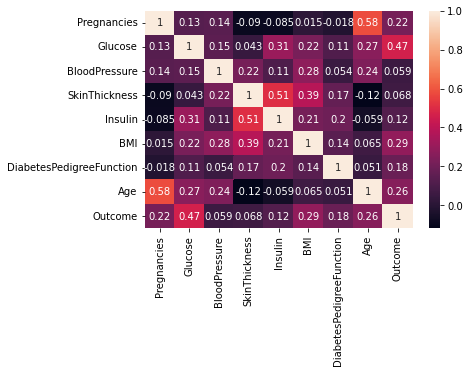

In [26]:
# Plot heatmap to check the correlation 
sns.heatmap(df_diabetes.corr(),annot=True)

#### Observation:
###### • Good Correction between Age and Pregnancies
###### • Positive Correction between Outcome and Glucose
###### • Positive Correction between Insulin and SkinThickness

# Step-4. Model Evaluation

In [27]:
feature_cols =   ['Pregnancies','SkinThickness', 'Insulin', 'BMI', 'Age', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction']
feature_cols

['Pregnancies',
 'SkinThickness',
 'Insulin',
 'BMI',
 'Age',
 'Glucose',
 'BloodPressure',
 'DiabetesPedigreeFunction']

In [28]:
# Predictors and Target for model :
x = df_diabetes.drop('Outcome',axis=1)
y = df_diabetes['Outcome']

In [29]:
# Splitting the data into 80% train and 20% test data
X_train,X_test,Y_train,Y_test = train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=1)

###### Create Decision Tree Classifer for criterion="gini"

In [30]:
dt = DecisionTreeClassifier()

In [31]:
# fit the model
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [32]:
y_pred = dt.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [33]:
# Accuracy Score 
metrics.accuracy_score(Y_test,y_pred)

0.6883116883116883

In [34]:
# Confusion Matrix
confusion_matrix(Y_test,y_pred)

array([[76, 23],
       [25, 30]])

In [35]:
#Evaluation using Classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76        99
           1       0.57      0.55      0.56        55

    accuracy                           0.69       154
   macro avg       0.66      0.66      0.66       154
weighted avg       0.69      0.69      0.69       154



In [36]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
import graphviz

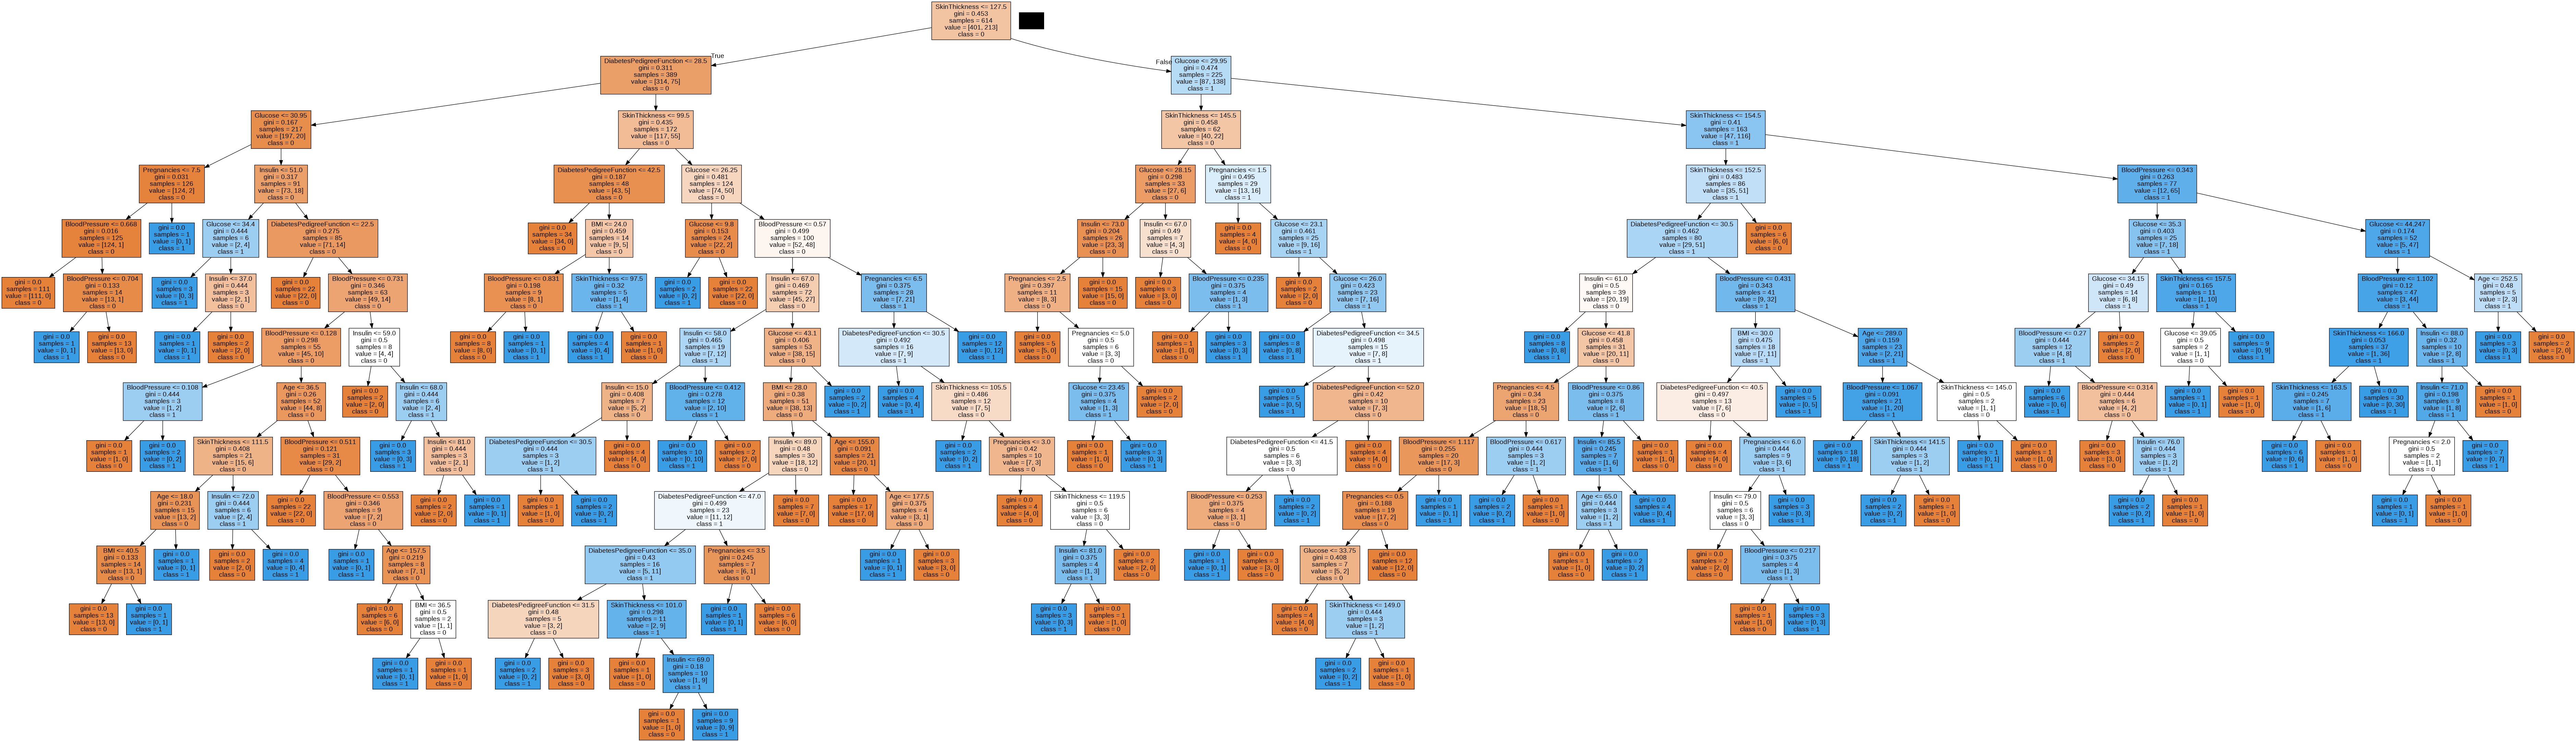

In [37]:
dot_data = StringIO()
export_graphviz(dt,out_file = dot_data,
               filled=True,
               feature_names=feature_cols,
               class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

###### Create Decision Tree Classifer for criterion="entropy", max_depth=3

In [38]:
# Create Decision Tree classifer object
dt = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
dt = dt.fit(X_train,Y_train)

#Predict the response for test dataset
y_pred = dt.predict(X_test)

In [39]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.7987012987012987


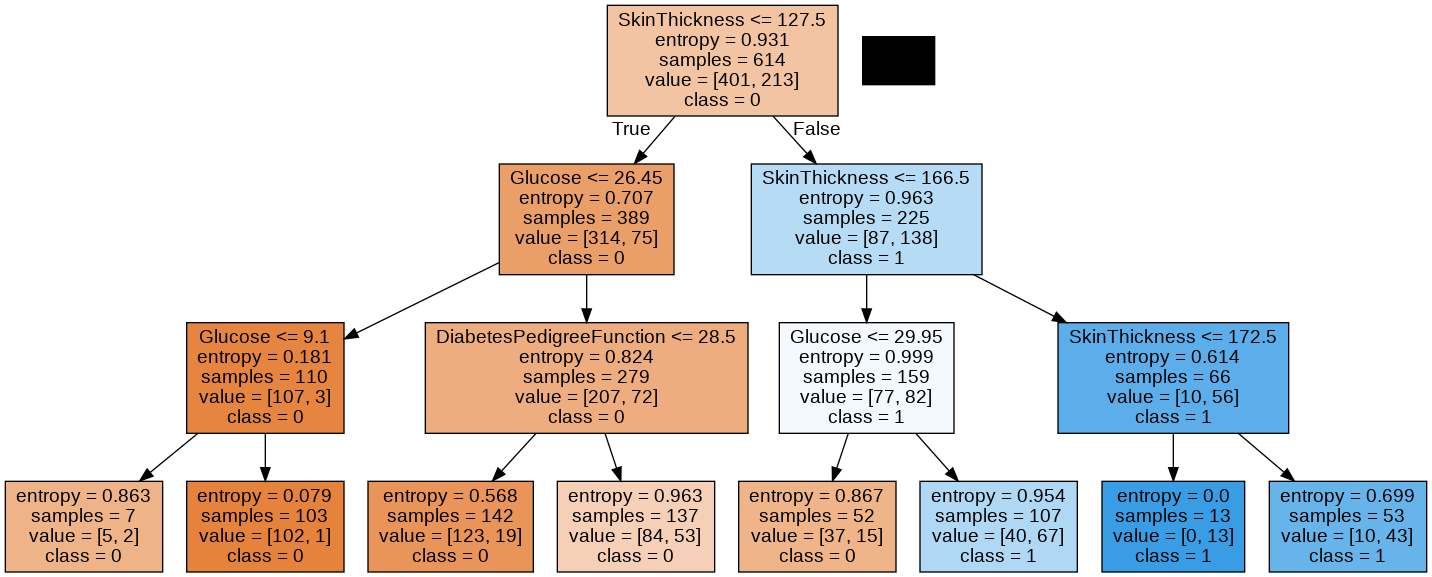

In [42]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,filled=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes_set.png')
Image(graph.create_png())

###### Create Decision Tree Classifer for criterion="gini", max_depth=3 ,min_samples_split=4

In [43]:
# Create Decision Tree classifer object
dt = DecisionTreeClassifier(criterion="gini", max_depth=3,min_samples_split=4)

# Train Decision Tree Classifer
dt = dt.fit(X_train,Y_train)

#Predict the response for test dataset
y_pred = dt.predict(X_test)

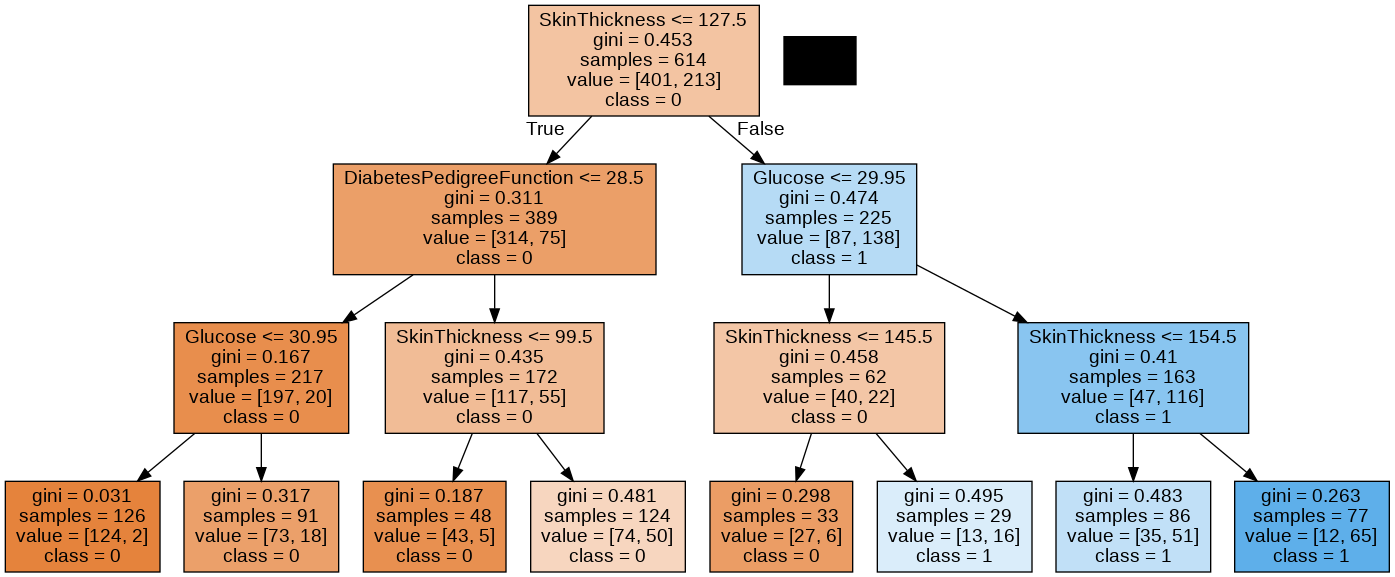

In [45]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,filled=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes_set.png')
Image(graph.create_png())

###### Find best estimator for model using GridSearchCV

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
params = {'max_leaf_nodes': list(range(20, 50)), 'min_samples_split': [20, 30, 40, 50, 60]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=20), params, cv=3)
grid_search_cv.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=20),
             param_grid={'max_leaf_nodes': [20, 21, 22, 23, 24, 25, 26, 27, 28,
                                            29, 30, 31, 32, 33, 34, 35, 36, 37,
                                            38, 39, 40, 41, 42, 43, 44, 45, 46,
                                            47, 48, 49],
                         'min_samples_split': [20, 30, 40, 50, 60]})

In [48]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=21, min_samples_split=20, random_state=20)

###### Create Decision Tree Classifer for criterion="entropy", max_depth=3 ,max_leaf_nodes=6

In [49]:
# Create Decision Tree classifer object
dt = DecisionTreeClassifier(criterion="entropy",min_samples_split=20,max_leaf_nodes=21,max_depth=3)

# Train Decision Tree Classifer
dt = dt.fit(X_train,Y_train)

#Predict the response for test dataset
y_pred = dt.predict(X_test)

In [50]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.7987012987012987


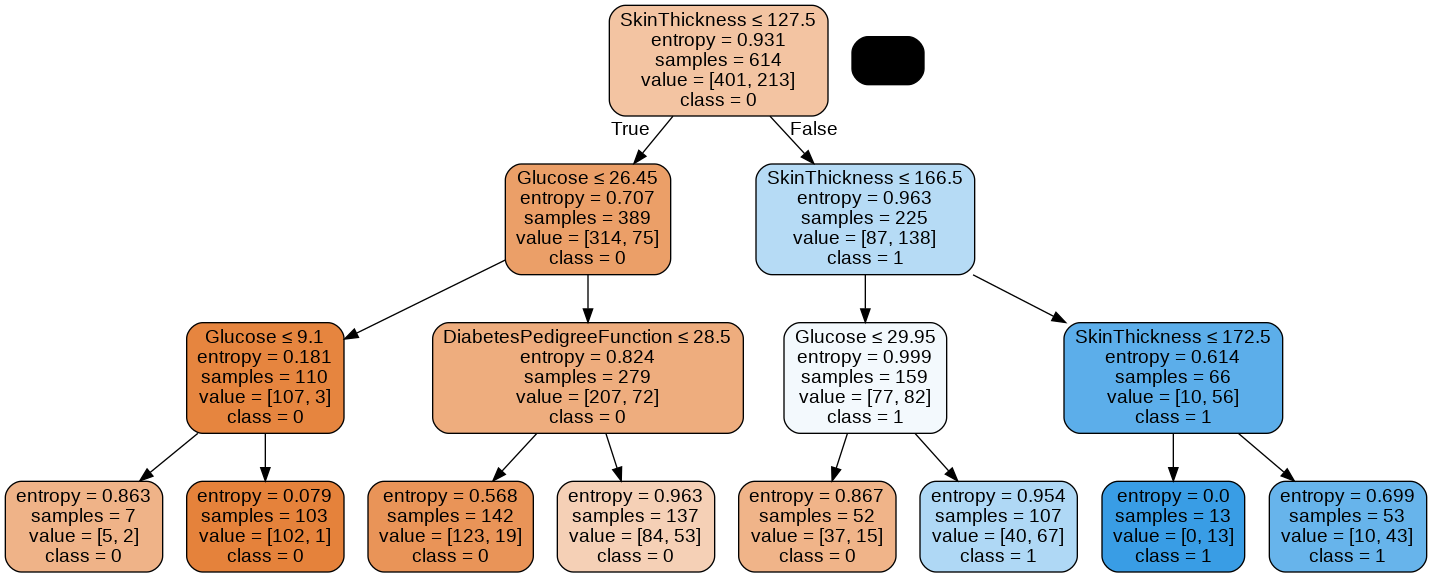

In [51]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,filled=True, rounded=True,special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes_set.png')
Image(graph.create_png())